(100, 120) 50


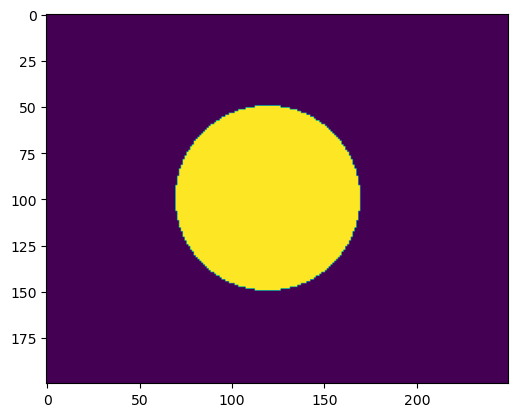

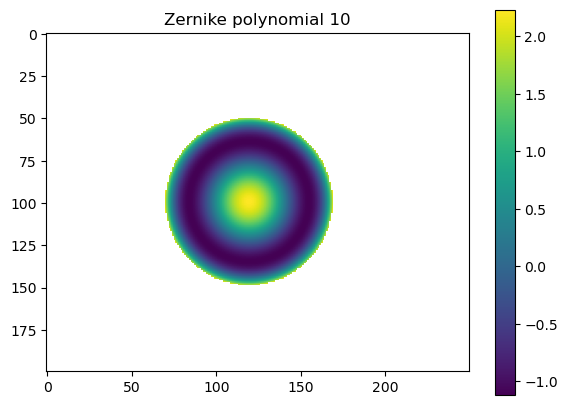

In [1]:
import matplotlib.pyplot as plt
from arte.types.mask import CircularMask
from arte.utils.zernike_generator import ZernikeGenerator
import numpy as np
cm = CircularMask((200,250),50,(100,120))
plt.figure()
plt.imshow(cm.mask()* -1 +1)
nzern = 36
zz = ZernikeGenerator(cm)
print(zz.center(), zz.radius())
zern_cube = np.rollaxis(np.ma.masked_array([zz.getZernike(n) for n in range(1,nzern+1)]),0,3)
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.imshow(zern_cube[:,:,10])
plt.title('Zernike polynomial 10')
plt.colorbar()
plt.show()

In [2]:
c_wf = np.random.rand(nzern)
wf =  np.ma.masked_array(zern_cube @ c_wf, mask=cm.mask())
zern_cube_compressed = np.array([zern_cube[:,:,n].compressed() for n in range(0,nzern)]).T
zrec = np.linalg.pinv(zern_cube_compressed)
coeffs = zrec @ wf.compressed()
print("Normalized RMS: %g " % np.sqrt(np.sum((coeffs-c_wf)**2)/len(coeffs)))


Normalized RMS: 1.61208e-15 


In [3]:
from arte.utils.modal_decomposer import ZernikeModalDecomposer
from arte.types.wavefront import Wavefront

#cm_ma = np.ma.masked_array(np.ones((200,250)),mask=cm.mask())
#cmask = CircularMask.fromMaskedArray(cm_ma)

nzern2fit = 36
mdc = ZernikeModalDecomposer(nzern2fit)
mdcj = ZernikeModalDecomposer(nzern2fit)
coeffs2 = mdcj.measureZernikeCoefficientsFromWavefront(Wavefront(wf.data), cm, cm).toNumpyArray()
coeffs1 = mdc.measureZernikeCoefficientsFromWavefront(Wavefront(wf.data), cm, cm).toNumpyArray()
print("Normalized RMS: %g " % np.sqrt(np.sum((coeffs2-c_wf)**2)/len(coeffs)))

Normalized RMS: 0.421714 


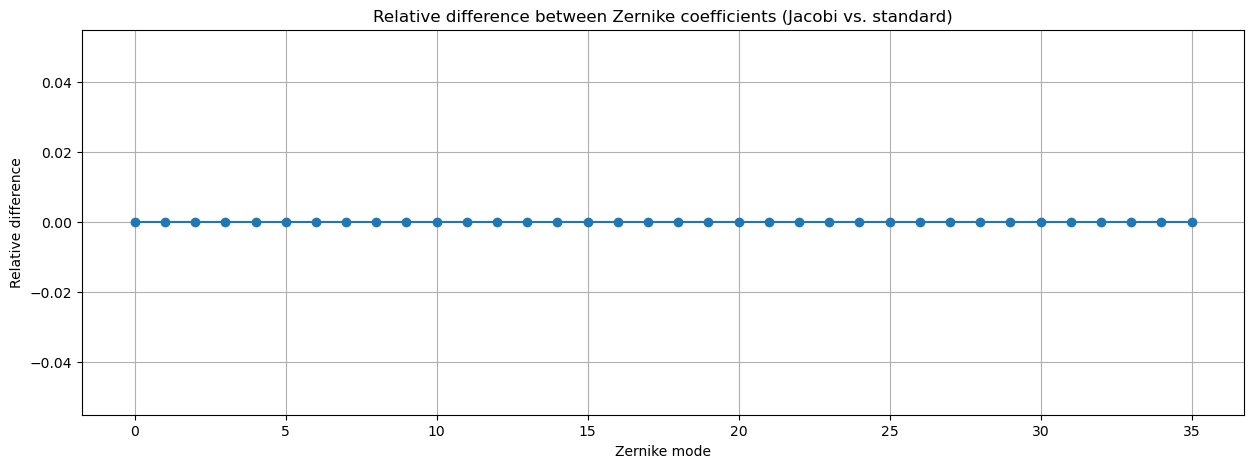

In [4]:
plt.figure(figsize=(15,5))
plt.plot((coeffs1-coeffs2)/np.abs(coeffs1), '-o')
plt.title('Relative difference between Zernike coefficients (Jacobi vs. standard)')
plt.xlabel('Zernike mode')
plt.ylabel('Relative difference')
plt.grid()
plt.show()

In [5]:

print((coeffs1-coeffs2)/np.abs(coeffs1))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


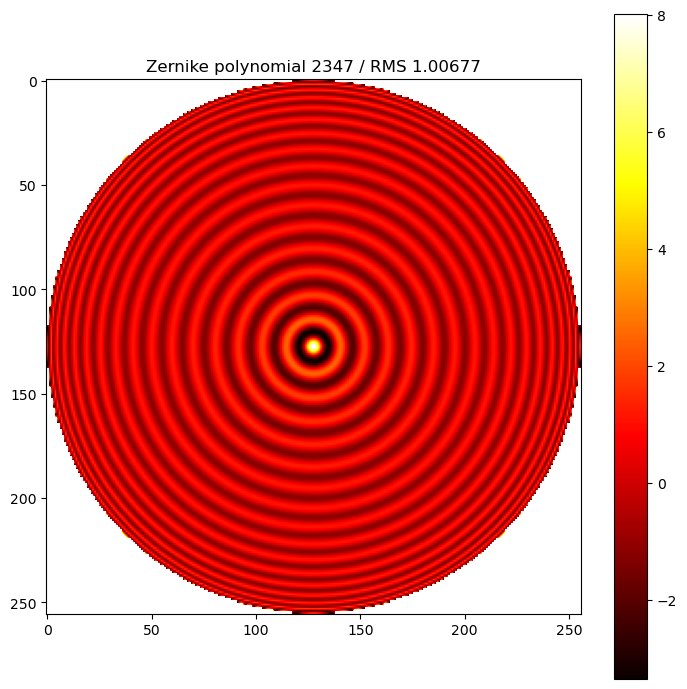

In [8]:
zz = ZernikeGenerator(CircularMask((256,256)))
n=2347
plt.figure(figsize=(14,7))
plt.subplot(121)
plt.imshow(zz.getZernike(n), cmap='hot' )
plt.colorbar()
plt.title('Zernike polynomial %d / RMS %g' % (n, zz.getZernike(n).std()))
plt.tight_layout()
plt.show()


/Users/lbusoni/git/arte/arte/utils/zernike_generator.py:188: RuntimeWarning: divide by zero encountered in scalar divide
  const = 1/jacobi(K, 0, m, monic=True)(1)  # BW pg 770, Magnus pg 210
/Users/lbusoni/git/arte/arte/utils/zernike_generator.py:190: RuntimeWarning: invalid value encountered in multiply
  Rnm = const * pow(rho, m) * cJ
/var/folders/yy/y6mh4b390sj24kqkcp9nl2c40000gp/T/ipykernel_20456/3587366425.py:9: UserWarning: Warning: converting a masked element to nan.
  std_vector[i] = zzj.getZernike(n).std()
/Users/lbusoni/opt/anaconda3/envs/arte/lib/python3.10/site-packages/scipy/special/_orthogonal.py:374: RuntimeWarning: invalid value encountered in scalar divide
  hn *= _gam(n + beta + 1.0) / _gam(n + 1) / _gam(n + ab1)
/Users/lbusoni/opt/anaconda3/envs/arte/lib/python3.10/site-packages/scipy/special/_orthogonal.py:375: RuntimeWarning: invalid value encountered in scalar divide
  kn = _gam(2 * n + ab1) / 2.0**n / _gam(n + 1) / _gam(n + ab1)


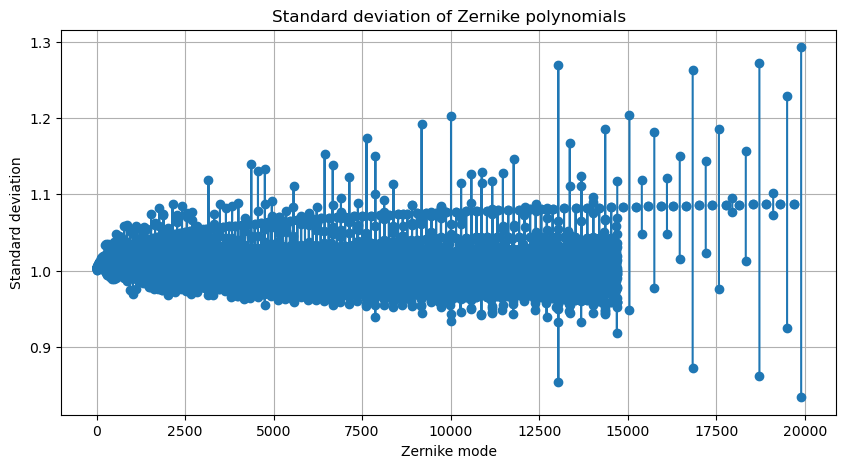

In [ ]:
import matplotlib.pyplot as plt
from arte.types.mask import CircularMask
from arte.utils.zernike_generator import ZernikeGenerator
import numpy as np
zzj = ZernikeGenerator(CircularMask((128,128)))
z_index = np.arange(2,2000) 
std_vector = np.zeros(len(z_index))
for i, n in enumerate(z_index):
    std_vector[i] = zzj.getZernike(n).std()
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(z_index, std_vector, marker='o')
plt.title('Standard deviation of Zernike polynomials')
plt.xlabel('Zernike mode')
plt.ylabel('Standard deviation')
plt.grid()
plt.show()